In [1]:
from google.colab import files
uploaded = files.upload()

Saving Subscription_Service_Churn_Dataset.csv to Subscription_Service_Churn_Dataset.csv


In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Subscription_Service_Churn_Dataset.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            759 non-null    float64
 2   TotalCharges              777 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                702 non-null    float64
 14  SupportTic

(None,
    AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
 0          42       11.321950    475.521914            Basic   
 1          95       12.810915   1217.036887         Standard   
 2           6             NaN     91.583304         Standard   
 3          54       17.917819    967.562224            Basic   
 4          27             NaN    339.057244            Basic   
 
       PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
 0  Electronic check              Yes      Movies               Yes   
 1  Electronic check              Yes    TV Shows                No   
 2       Credit card              Yes    TV Shows                No   
 3               NaN              Yes      Movies                No   
 4      Mailed check               No    TV Shows                No   
 
   DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
 0           Tablet             0.386852  ...                        25   
 1           Mobile    

In [3]:
# Step 1: Data Cleaning & Preprocessing

# 1. Check missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)

# 2. Drop columns with too many missing values (e.g., SubtitlesEnabled)
df_cleaned = df.drop(columns=['SubtitlesEnabled'])

# 3. Impute missing numerical columns with median
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# 4. Impute missing categorical columns with mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# 5. Encode binary categorical columns (Yes/No)
binary_cols = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl']
for col in binary_cols:
    df_cleaned[col] = df_cleaned[col].map({'Yes': 1, 'No': 0})

# Preview cleaned data
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            963 non-null    float64
 2   TotalCharges              963 non-null    float64
 3   SubscriptionType          963 non-null    object 
 4   PaymentMethod             963 non-null    object 
 5   PaperlessBilling          963 non-null    int64  
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    int64  
 8   DeviceRegistered          963 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           963 non-null    object 
 13  UserRating                963 non-null    float64
 14  SupportTic

<ipython-input-3-3834509772>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-3-3834509772>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

(None,
    AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
 0          42       11.321950    475.521914            Basic   
 1          95       12.810915   1217.036887         Standard   
 2           6       12.169888     91.583304         Standard   
 3          54       17.917819    967.562224            Basic   
 4          27       12.169888    339.057244            Basic   
 
       PaymentMethod  PaperlessBilling ContentType  MultiDeviceAccess  \
 0  Electronic check                 1      Movies                  1   
 1  Electronic check                 1    TV Shows                  0   
 2       Credit card                 1    TV Shows                  0   
 3       Credit card                 1      Movies                  0   
 4      Mailed check                 0    TV Shows                  0   
 
   DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
 0           Tablet             0.386852               24.593361   
 1           Mobile      

In [4]:
# Step-by-step diagnostics for the KDE plot issue

# Step 1: Check data types of the problematic columns
column_types = df_cleaned[['ViewingHoursPerWeek', 'AverageViewingDuration', 'UserRating', 'SupportTicketsPerMonth']].dtypes

# Step 2: Display unique values for each to identify non-numeric anomalies
unique_vals = {
    col: df_cleaned[col].unique()[:10]  # show first 10 unique values only
    for col in ['ViewingHoursPerWeek', 'AverageViewingDuration', 'UserRating', 'SupportTicketsPerMonth']
}

column_types, unique_vals


(ViewingHoursPerWeek       float64
 AverageViewingDuration    float64
 UserRating                float64
 SupportTicketsPerMonth      int64
 dtype: object,
 {'ViewingHoursPerWeek': array([ 0.38685232, 37.12299991, 30.7169444 ,  2.49537296, 39.93691005,
          7.31017211, 19.00889994, 24.42941349, 15.48891251,  2.12176246]),
  'AverageViewingDuration': array([ 24.59336129, 102.8607951 ,  10.51241512,  45.24683449,
          94.31095421, 123.28079409,  86.12255889, 137.55787448,
         137.55294155, 164.07364267]),
  'UserRating': array([3.48946452, 2.25185995, 2.89832789, 1.2750036 , 3.23622982,
         2.77961436, 4.93349448, 2.15473715, 1.7257004 , 2.68385293]),
  'SupportTicketsPerMonth': array([7, 3, 4, 6, 9, 2, 0, 1, 8, 5])})

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Subscription_Churn_Tableau_Ready.csv to Cleaned_Subscription_Churn_Tableau_Ready.csv


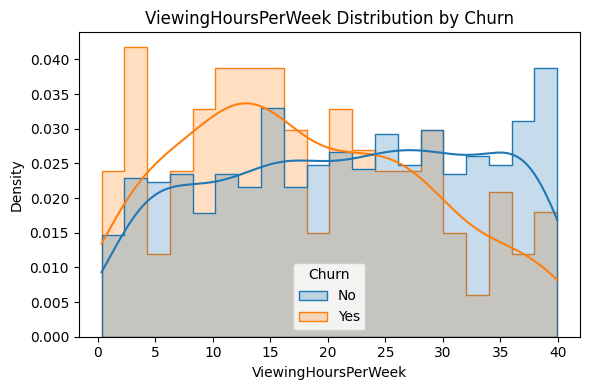

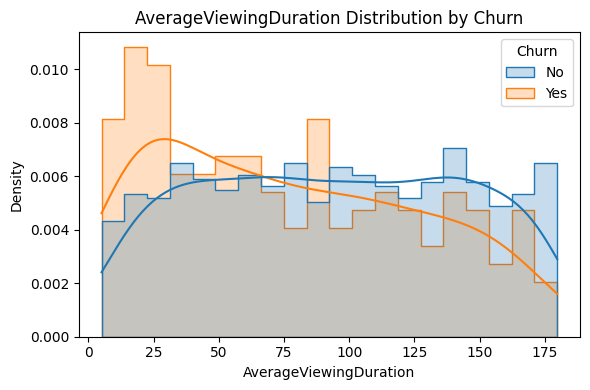

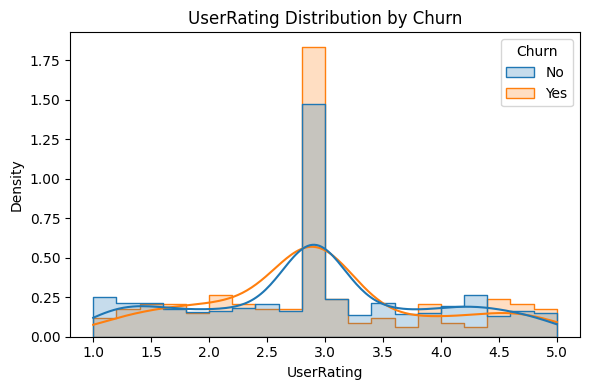

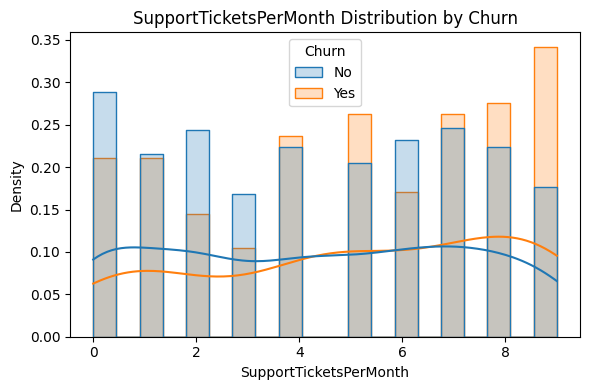

In [5]:
# Load the re-uploaded dataset
import pandas as pd

file_path = "Cleaned_Subscription_Churn_Tableau_Ready.csv"
df = pd.read_csv(file_path)

# Make a copy for plotting
df_cleaned = df.copy()

# Re-import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create KDE plots using sns.histplot
for col in ['ViewingHoursPerWeek', 'AverageViewingDuration', 'UserRating', 'SupportTicketsPerMonth']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_cleaned, x=col, hue='Churn', kde=True, bins=20, element="step", stat="density", common_norm=False)
    plt.title(f"{col} Distribution by Churn")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


In [10]:
# Feature Engineering

from sklearn.preprocessing import LabelEncoder

# Copy the original dataset to start engineering
df_fe = df.copy()

# Convert target variable 'Churn' to binary
df_fe['Churn'] = df_fe['Churn'].map({'Yes': 1, 'No': 0})

# Feature Engineering
df_fe['EngagementScore'] = df_fe['ViewingHoursPerWeek'] * df_fe['AverageViewingDuration']
df_fe['RecentSupportLoad'] = df_fe['SupportTicketsPerMonth'] / (df_fe['AccountAge'] + 1)  # avoid divide by zero

# Label encode categorical variables for XGBoost/LightGBM
categorical_cols = df_fe.select_dtypes(include='object').columns.drop('CustomerID')
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_fe[col] = le.fit_transform(df_fe[col])
    label_encoders[col] = le

# Drop CustomerID for modeling
df_fe.drop(columns=['CustomerID'], inplace=True)

# Show final columns for model training
df_fe.columns


Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'Churn', 'EngagementScore', 'RecentSupportLoad'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb
import lightgbm as lgb

# Define features and target
X = df_fe.drop(columns=['Churn'])
y = df_fe['Churn']

# Train-Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
lgb_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Evaluation summary
xgb_report = classification_report(y_test, xgb_preds, output_dict=True)
lgb_report = classification_report(y_test, lgb_preds, output_dict=True)

{
    "XGBoost AUC": xgb_auc,
    "LightGBM AUC": lgb_auc,
    "XGBoost Accuracy": xgb_report['accuracy'],
    "LightGBM Accuracy": lgb_report['accuracy']
}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:37:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 135, number of negative: 635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1983
[LightGBM] [Info] Number of data points in the train set: 770, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175325 -> initscore=-1.548350
[LightGBM] [Info] Start training from score -1.548350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

{'XGBoost AUC': np.float64(0.6738808731039586),
 'LightGBM AUC': np.float64(0.6711061783203847),
 'XGBoost Accuracy': 0.8186528497409327,
 'LightGBM Accuracy': 0.8341968911917098}

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:39:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/tmp/ipython-input-13-394085711.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')


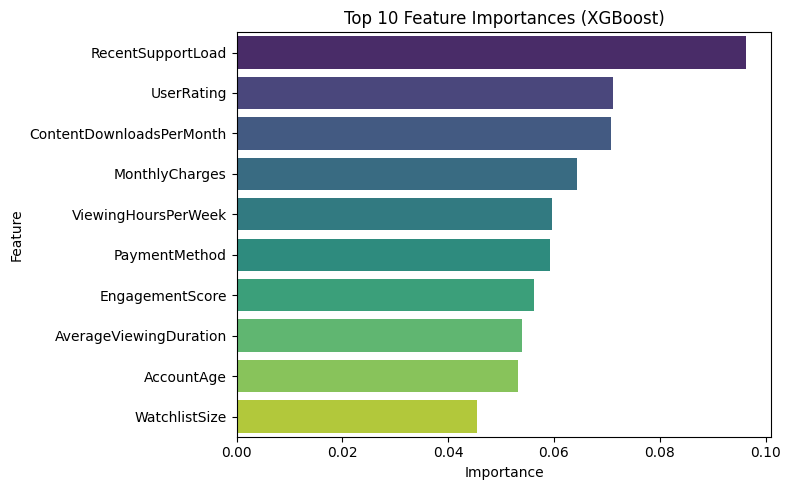

In [13]:
# Re-initialize and re-train XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Reload dataset
file_path = "Cleaned_Subscription_Churn_Tableau_Ready.csv"
df = pd.read_csv(file_path)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['EngagementScore'] = df['ViewingHoursPerWeek'] * df['AverageViewingDuration']
df['RecentSupportLoad'] = df['SupportTicketsPerMonth'] / (df['AccountAge'] + 1)
df.drop(columns=['CustomerID'], inplace=True)

# Encode categoricals
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Train-Test Split
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Feature importance plot
xgb_importance = xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [1]:
!pip install networkx==2.8.8 --force-reinstall


  Using cached networkx-2.8.8-py3-none-any.whl.metadata (5.1 kB)
Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which

In [2]:
#  Step 1: Install DoWhy (run only once if not already installed)
!pip install dowhy


#  Step 2: Import Libraries
import pandas as pd
from dowhy import CausalModel
from sklearn.preprocessing import LabelEncoder

# Step 3: Load Dataset
df = pd.read_csv("Cleaned_Subscription_Churn_Tableau_Ready.csv")

# Step 4: Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#  Step 5: Feature Engineering
df['EngagementScore'] = df['ViewingHoursPerWeek'] * df['AverageViewingDuration']
df['RecentSupportLoad'] = df['SupportTicketsPerMonth'] / (df['AccountAge'] + 1)

#  Step 6: Label Encode Categorical Columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

#  Step 7: Define Treatment, Outcome, and Confounders
treatment = "ParentalControl"  # You can change to MultiDeviceAccess or others
outcome = "Churn"
confounders = [
    "AccountAge", "EngagementScore", "SubscriptionType",
    "MonthlyCharges", "SupportTicketsPerMonth", "UserRating"
]

#  Step 8: Build the Causal Model
model = CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    common_causes=confounders
)

#  Step 9: Identify and Estimate Effect
identified_model = model.identify_effect()

estimate = model.estimate_effect(
    identified_model,
    method_name="backdoor.propensity_score_matching"
)

print(f"Estimated effect of {treatment} on {outcome}: {estimate.value}")

#  Step 10: Refutation Test
refute = model.refute_estimate(
    identified_model,
    estimate,
    method_name="placebo_treatment_refuter"
)

print("\nRefutation result:")
print(refute)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Estimated effect of ParentalControl on Churn: -0.013499480789200415

Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:-0.013499480789200415
New effect:0.0032398753894080996
p value:0.8400000000000001

